In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk import WordNetLemmatizer

## Reading files

In [17]:
urdu_dataset = pd.read_csv("urdu-sentiment-corpus-v1.tsv",sep="\t")
urdu_dataset.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,P
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,N
2,ٹویٹر کا خیال کیسے آیا ؟,O
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",P
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,P


In [18]:
urdu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   1000 non-null   object
 1   Class   999 non-null    object
dtypes: object(2)
memory usage: 15.8+ KB


## Removing null values

In [19]:
print(urdu_dataset.isna().sum())
null_check = urdu_dataset.isna().sum().sum()>0
if null_check:
    urdu_dataset.dropna(inplace=True)
    print("After Null values Removed\n",urdu_dataset.isna().sum())

Tweet    0
Class    1
dtype: int64
After Null values Removed
 Tweet    0
Class    0
dtype: int64


In [20]:
urdu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   999 non-null    object
 1   Class   999 non-null    object
dtypes: object(2)
memory usage: 23.4+ KB


## Values counts

In [22]:
urdu_dataset.Class.value_counts()

N    499
P    480
O     20
Name: Class, dtype: int64

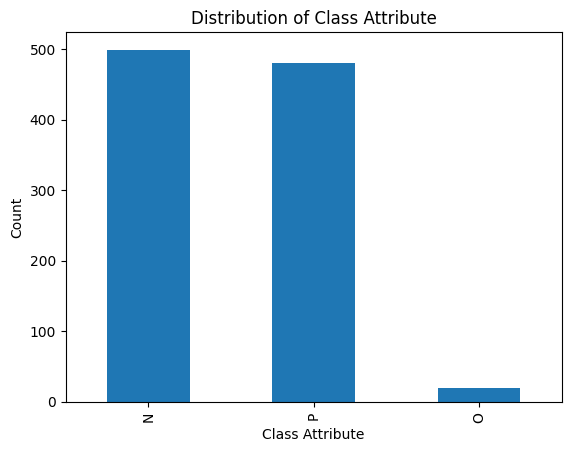

In [24]:
urdu_dataset['Class'].value_counts().plot(kind='bar')

plt.xlabel('Class Attribute')
plt.ylabel('Count')
plt.title('Distribution of Class Attribute')

plt.show()

## Label Encoding Class Attribute

In [27]:
label_encoder = LabelEncoder()
urdu_dataset['Class'] = label_encoder.fit_transform(urdu_dataset['Class'])

print(urdu_dataset['Class'].unique())
#0 -> Negative
#2 -> Positive
#1 -> Neutral

[2 0 1]


In [28]:
urdu_dataset.Class.value_counts()

0    499
2    480
1     20
Name: Class, dtype: int64

## Preprocessing
#0 -> Negative
#2 -> Positive
#1 -> Neutral

In [29]:
urdu_dataset.head()

,Tweet,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,2
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,0
2,ٹویٹر کا خیال کیسے آیا ؟,1
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",2
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,2


In [35]:

file_path = 'my_urdu_stopwords.txt'
with open(file_path,'r',encoding='utf-8')as file:
    urdu_stop_words = file.readlines()
print(urdu_stop_words)

['اب\n', 'ابھی\n', 'اپنا\n', 'اپنے\n', 'اپنی\n', 'اٹھا\n', 'اس\n', 'اسے\n', 'اسی\n', 'اگر\n', 'ان\n', 'انہوں\n', 'انہی\n', 'انہیں\n', 'انھیں\n', 'او\n', 'اور\n', 'اے\n', 'ایسا\n', 'ایسے\n', 'ایسی\n', 'ایک\n', 'آ\n', 'آپ\n', 'آتا\n', 'آتے\n', 'آتی\n', 'آگے\n', 'آنا\n', 'آنے\n', 'آنی\n', 'آئے\n', 'آئی\n', 'آئیں\n', 'آیا\n', 'با\n', 'بڑا\n', 'بڑے\n', 'بڑی\n', 'بعد\n', 'بعض\n', 'بلکہ\n', 'بہت\n', 'بھی\n', 'بے\n', 'پاس\n', 'پر\n', 'پہلے\n', 'پھر\n', 'تا\n', 'تاکہ\n', 'تب\n', 'تجھ\n', 'تجھے\n', 'تک\n', 'تم\n', 'تمام\n', 'تمہارا\n', 'تمہارے\n', 'تمھارے\n', 'تمہاری\n', 'تمہیں\n', 'تمھیں\n', 'تھا\n', 'تھے\n', 'تھی\n', 'تھیں\n', 'تو\n', 'تیری\n', 'تیرے\n', 'جا\n', 'جاتا\n', 'جاتی\n', 'جاتے\n', 'جاتی\n', 'جانے\n', 'جانی\n', 'جاؤ\n', 'جائے\n', 'جائیں\n', 'جب\n', 'جس\n', 'جن\n', 'جنہوں\n', 'جنہیں\n', 'جو\n', 'جیسا\n', 'جیسے\n', 'جیسی\n', 'جیسوں\n', 'چاہیئے\n', 'چلا\n', 'چاہے\n', 'چونکہ\n', 'حالاں\n', 'حالانکہ\n', 'دو\n', 'دونوں\n', 'دوں\n', 'دے\n', 'دی\n', 'دیا\n', 'دیں\n', 'دیے\n', 'دیتا\n', 'دیتے

In [51]:
import string
print(len(urdu_stop_words))

265


In [56]:

def preprocess_text(text,stopwords):
    text = text.str.replace(r'[\(\[].*?[\)\]]', '')# Remove text in square brackets and parentheses
    
    text = text.str.replace('\n', ' ')# Remove newline characters
    
    text = text.str.lower()# Convert text to lowercase
    
    text = text.str.replace(r'\d+', '')# Remove numbers
    
    text = text.str.replace(r'[@#]', '')# Remove '@' and '#' characters
   
    text = text.str.replace('[{}]'.format(string.punctuation), '') # Remove punctuation
    
    clean_text = []
    ignore = set(stopwords)  # Remove stopwords from text
    
    for i in text:
        words = nltk.word_tokenize(i)
        words = [word for word in words if word not in ignore and len(word) > 1]
        res_text = " ".join(words)
        clean_text.append(res_text)
        
    return clean_text

    removed_stopwords = []
    for text in Tweet_text:
        if text not in stopwords:
            removed_stopwords.append(text)
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)


In [71]:
processed_df=pd.DataFrame(columns=['old_text','text'])
processed_df['old_text'] = urdu_dataset['Tweet']
processed_df['text'] = preprocess_text(processed_df['old_text'],urdu_stop_words)
processed_df['text_lemmatized'] = processed_df['text'].apply(lemmatize_text)
processed_df['text_separated'] = processed_df['text'].apply(str)
processed_df['Class'] = urdu_dataset['Class']

processed_df.head()

C:\Users\Hamza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\Hamza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\Hamza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Hamza\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == "":


,old_text,text,text_lemmatized,text_separated,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,2
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,0
2,ٹویٹر کا خیال کیسے آیا ؟,ٹویٹر کا خیال کیسے آیا,ٹویٹر کا خیال کیسے آیا,ٹویٹر کا خیال کیسے آیا,1
3,"سرچ انجن گوگل کے نائب صدر نے فضا میں ، 130,000...",سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,2
4,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,ابھی تک اسکی لہریں کبھی کبھی جاتی ہیں یار أْ,ابھی تک اسکی لہریں کبھی کبھی جاتی ہیں یار أْ,ابھی تک اسکی لہریں کبھی کبھی جاتی ہیں یار أْ,2


In [72]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   old_text         999 non-null    object
 1   text             999 non-null    object
 2   text_lemmatized  999 non-null    object
 3   text_separated   999 non-null    object
 4   Class            999 non-null    int32 
dtypes: int32(1), object(4)
memory usage: 42.9+ KB


In [73]:
analysis_df = pd.DataFrame(columns=['word','Class'])
analysis_df.word = processed_df.text_separated.apply(str)
analysis_df.Class = processed_df.Class
analysis_df.head()

,word,Class
0,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,2
1,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,0
2,ٹویٹر کا خیال کیسے آیا,1
3,سرچ انجن گوگل کے نائب صدر نے فضا میں فٹ کی بلن...,2
4,ابھی تک اسکی لہریں کبھی کبھی جاتی ہیں یار أْ,2


## Analysis df to csv

In [78]:
analysis_df.to_csv('Analysed_Urdu_Tweets.csv')

## Split the dataset

In [75]:
from sklearn.model_selection import train_test_split
X=analysis_df.word
y = analysis_df.Class
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (749,) (749,)
Testing set shape: (250,) (250,)


## Models

Imports:

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
models = ["RNN","GRU","LSTM","BiLSTM"]